In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'2.3.0'

In [3]:
place = tf.constant("PPgEEC", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`place` is a {}-d Tensor".format(tf.rank(place).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`place` is a 0-d Tensor
`number` is a 0-d Tensor


In [4]:
places = tf.constant(["PPgEEC", "UFRN"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`places` is a {}-d Tensor with shape: {}".format(tf.rank(places).numpy(), tf.shape(places)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`places` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [8]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor using tf.constant'''
matrix = tf.constant(0, shape=(2, 3))

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2
print(matrix)

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)


In [13]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.

images = tf.zeros([10, 256, 256, 3], tf.int32)

assert isinstance(images, tf.Tensor), "images must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "images must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

In [16]:
print(matrix)
print()
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)

`row_vector`: [0 0 0]
`column_vector`: [0 0]
`scalar`: 0


In [17]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [18]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [21]:
print(func(5,4))

tf.Tensor(27, shape=(), dtype=int32)


In [22]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


In [24]:
### Defining a network Layer ###

# units: number of hidden units (number of neurons)
# input_shape: shape of the input
# x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, units=32):
    super(OurDenseLayer, self).__init__()
    self.units = units

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", 
                             shape=[d,self.units],  # note the dimensionality
                             initializer='random_normal')
    self.b = self.add_weight("bias",
                             shape=[1,self.units], # note the dimensionality
                             initializer='zeros') 

  def call(self, x):    
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x, self.W)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)

# The layer has three hidden units or three neurons
layer = OurDenseLayer(3)

# One instance with two features
x_input = tf.ones((1,2))

# 'build' >> 'call' 
y = layer(x_input)

# test the output!
print(y.numpy())

[[0.47525924 0.5040134  0.4925321 ]]


In [25]:
layer.weights

[<tf.Variable 'our_dense_layer/weight:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.05506101,  0.07728758,  0.0191822 ],
        [-0.04398289, -0.06123361, -0.04905606]], dtype=float32)>,
 <tf.Variable 'our_dense_layer/bias:0' shape=(1, 3) dtype=float32, numpy=array([[0., 0., 0.]], dtype=float32)>]

In [26]:
x_input

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

In [27]:
tf.sigmoid(tf.matmul(x_input, layer.weights[0]))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.47525924, 0.5040134 , 0.4925321 ]], dtype=float32)>

In [35]:
### Defining a neural network using the Sequential API ###

# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

# Define the number of units
units = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: In this exercise provide only the number of units, activation function as sigmoid
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable

dense_layer = Dense(units, 
                    activation='sigmoid', #activation=tf.nn.sigmoid
                    kernel_initializer=tf.constant_initializer(layer.weights[0].numpy())) # TODO


# Add the dense layer to the model
model.add(dense_layer)

In [36]:
# Test model with example input
x_input_ = tf.ones((1,2))

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input)
print(model_output.numpy())

[[0.47525924 0.5040134  0.4925321 ]]


In [37]:
### Defining a model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  # In __init__, we define the Model's layers
  def __init__(self, units):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.''' 
    
    self.dense_layer = Dense(units, 
                             activation='sigmoid',
                             kernel_initializer=tf.constant_initializer(layer.weights[0].numpy())) # TODO

  # In the call function, we define the Model's forward pass.
  def call(self, inputs):
    return self.dense_layer(inputs)

In [38]:
tf.random.set_seed(1)

units = 3
model = SubclassModel(units)

x_input_ = tf.ones((1,2))

print(model(x_input_))

tf.Tensor([[0.47525924 0.5040134  0.4925321 ]], shape=(1, 3), dtype=float32)


In [55]:
### Defining a model using subclassing and specifying custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

tf.random.set_seed(1)

class IdentityModel(tf.keras.Model):

  # As before, in __init__ we define the Model's layers
  # Since our desired behavior involves the forward pass, this part is unchanged
  def __init__(self, units):
    super(IdentityModel, self).__init__()
    self.dense_layer = Dense(units, 
                             activation='sigmoid',
                             kernel_initializer='random_uniform') # TODO

  '''TODO: Implement the behavior where the network outputs the input, unchanged, under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity: 
      return inputs
    return x

In [56]:
units = 3
model = IdentityModel(units)

x_input_ = tf.ones((1,2))

'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model(x_input)
out_identity = model(x_input, isidentity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.48999327 0.50483537 0.5068365 ]]; network identity output: [[1. 1.]]


In [57]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

Initializing x=[[0.6118191]]


Text(0, 0.5, 'x value')

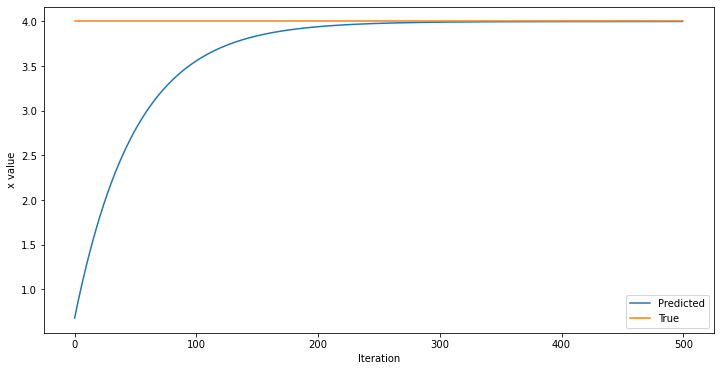

In [61]:
### Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss =   (x-x_f)**2  # TODO  (hint: L = (x - xf)^2)

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.figure(figsize=(12,6))
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')